In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv("C:\\Users\\vedprakash\\Downloads\\Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [8]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df["customerID"].duplicated().sum()

np.int64(0)

In [24]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

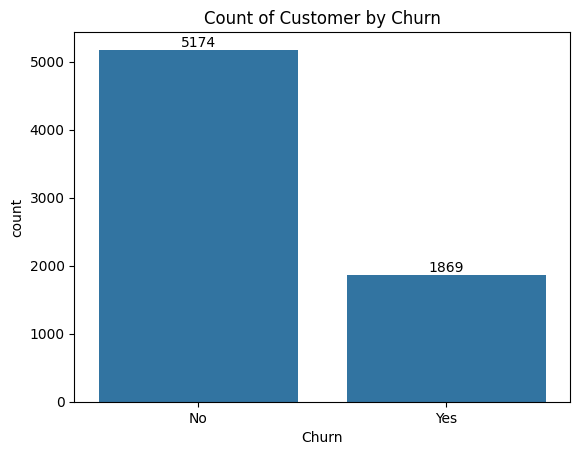

In [45]:
ax=sns.countplot(x=df["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

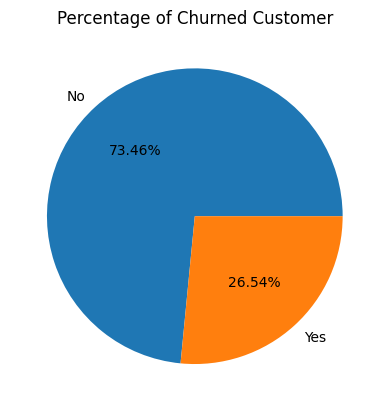

In [44]:
gb=df.groupby("Churn").agg({'Churn':'count'})
plt.pie("Churn",labels=gb.index,data=gb,autopct="%1.2f%%")
plt.title("Percentage of Churned Customer")
plt.show()

#from given pie chart we can conclude that 26.54% of our customers have churned out.
#now Let's explore the reason behind it 

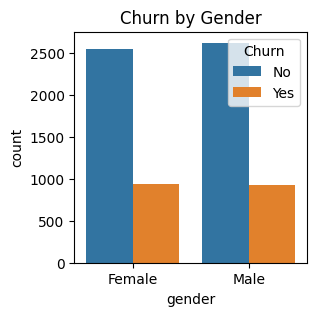

In [51]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

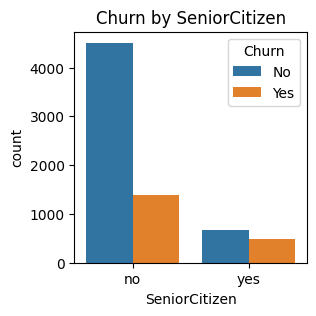

In [53]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

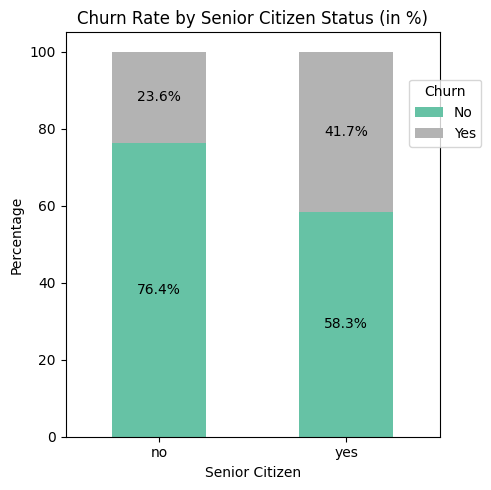

In [84]:
# 1. Create crosstab of counts

ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# 2. Convert counts to percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar chart
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(5,5), colormap='Set2')

# 4. Add percentage labels
for i, row in enumerate(ct_percent.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=10)
            cumulative += val

# 5. Styling
plt.title("Churn Rate by Senior Citizen Status (in %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(rotation=0)
plt.legend(title="Churn",bbox_to_anchor=(0.9,0.9))
plt.tight_layout()
plt.show()


#comparative a greated percentage of people in senior citizen category have churned.

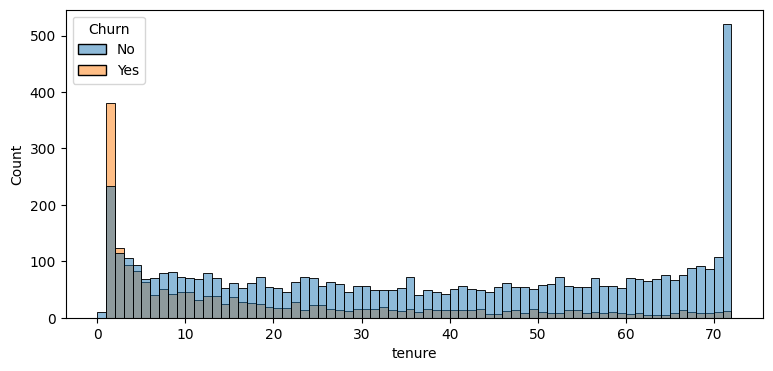

In [89]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

#people who have used our service for a long time have stayed and people who have used 
#our service 1 or 2 months have churned

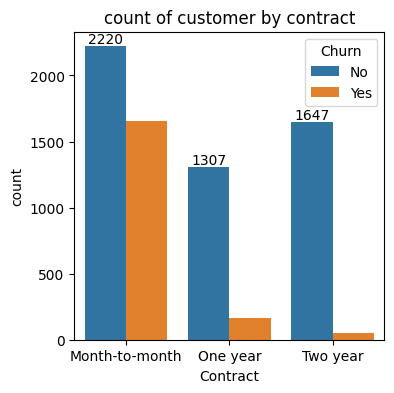

In [94]:
plt.figure(figsize=(4,4))
sn=sns.countplot(x="Contract",data=df,hue="Churn")
sn.bar_label(sn.containers[0])
plt.title("count of customer by contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [95]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

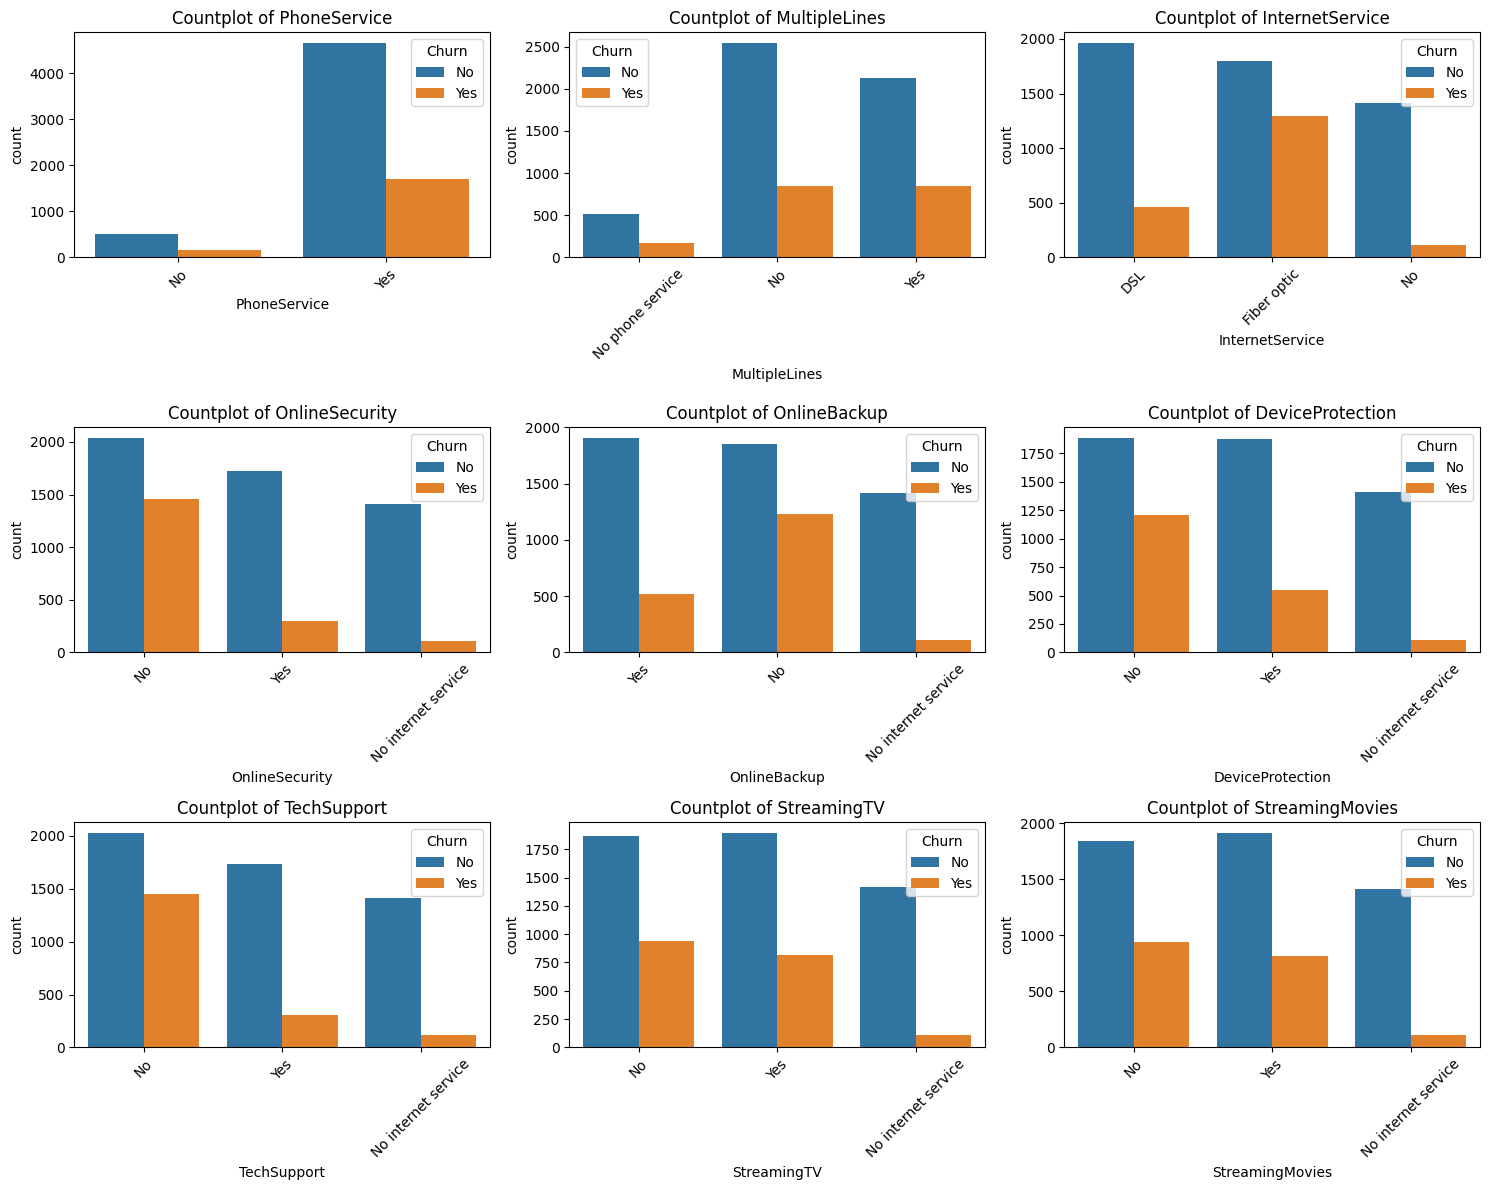

In [101]:
# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the grid for subplots (e.g., 3 rows × 3 columns for 9 plots)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Ceiling division

# Set the figure size
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through the columns and create countplots
for i, col in enumerate(columns,1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col,hue=df["Churn"])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plots
plt.show()


#The majority of customer who do not churn tend to have services like PhoneService,InternetService (particularly DSL), and 
#OnlineSecurity enabled. OnlineBackup,TechSupport, and StreamingTV,churn rates are noticeably higher when these service are not used or are unavailable

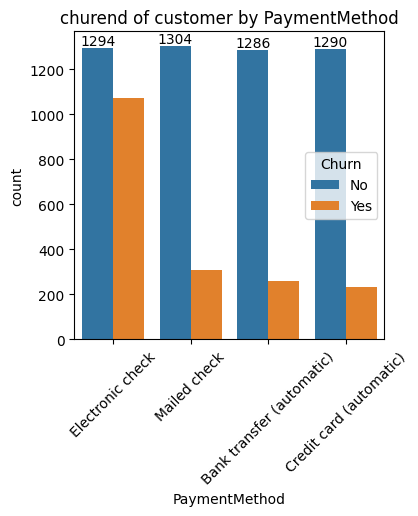

In [105]:
plt.figure(figsize=(4,4))
sn=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
sn.bar_label(sn.containers[0])
plt.title("churend of customer by PaymentMethod")
plt.xticks(rotation=45)
plt.show()

#customer are likely to chur when he is using electronic checks as a payment method.